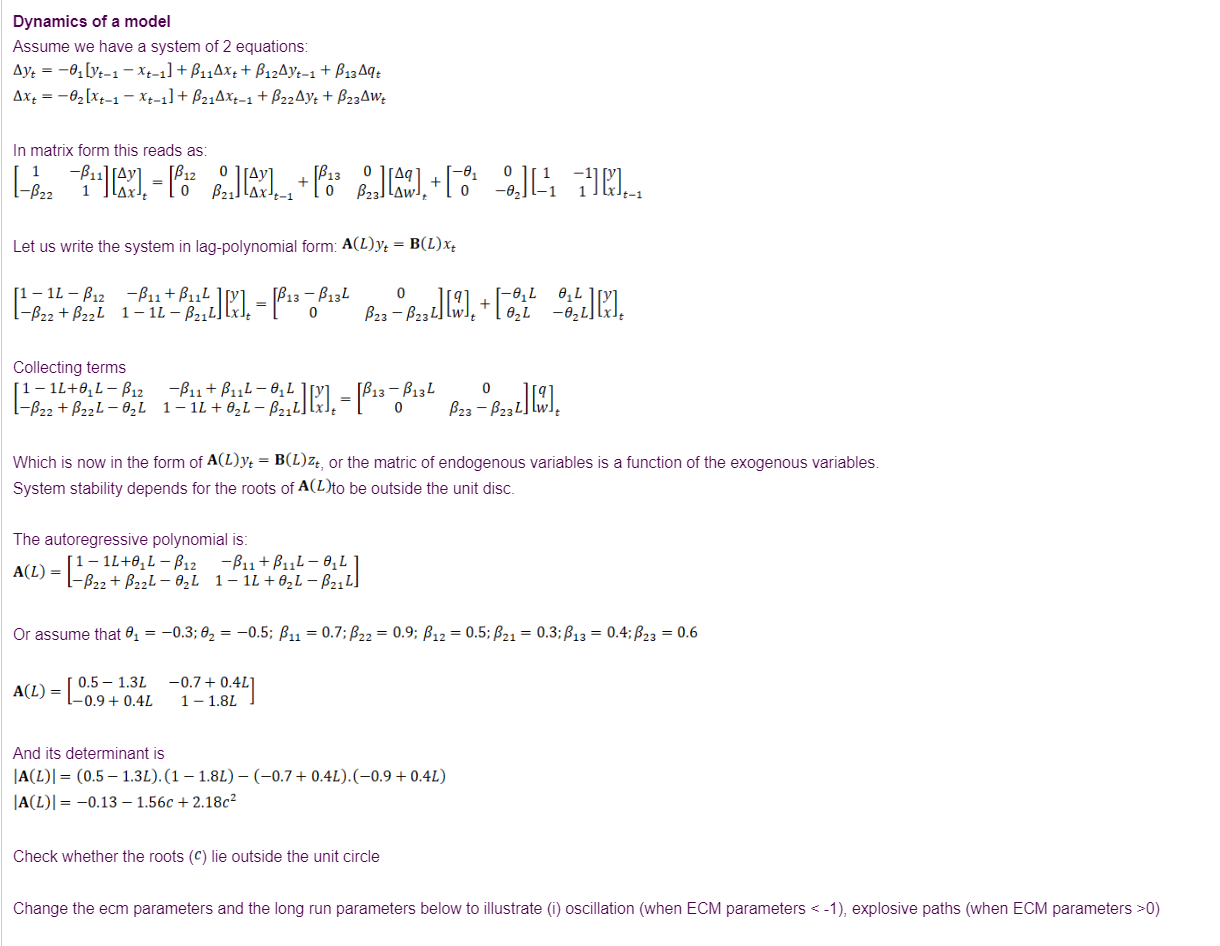

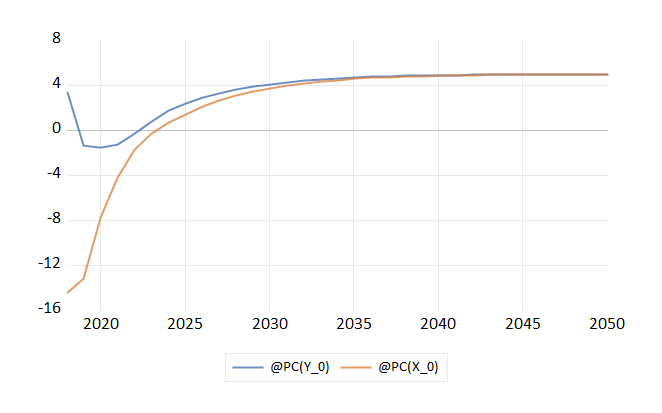

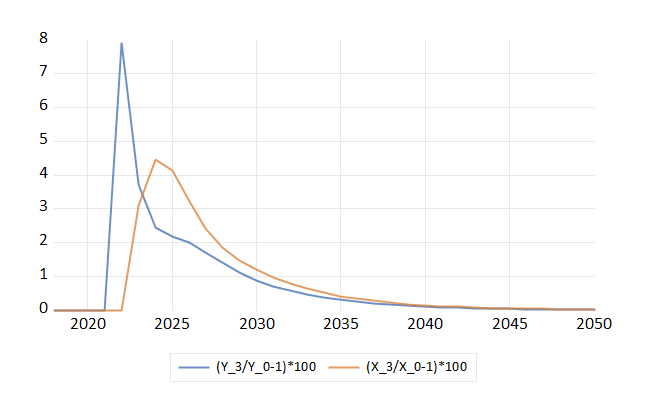

In [4]:
close @all

logmode l

 

wfcreate a 1980 2100

 

smpl @first @first

series y = 10

series x = 15

series w =7

series q = 9

 

smpl @first+1 2020

 

y = 1.03*y(-1)+0.6*nrnd

x = 1.03*x(-1)+0.9*nrnd

w = 1.013*w(-1)+0.2*nrnd

q = 1.01*q(-1)+0.2*nrnd

 

scalar theta1 = -0.3 ' ECM in Y-eq ''''' Change here for stability analysis (try <-1; -1<?<0; >1)

scalar theta2 = -0.4 ' ECM in X-eq ''''' Change here for stability analysis (try <-1; -1<?<0; >1)

 

 

scalar LRy_x = 1 'LR parameter of x in Y-eq

scalar LRx_y = 1 'LR parameter of y in Y-eq

 

scalar SRy_x = 0.7 'SR parameter of x in Y-eq

scalar SRy_y = 0.5 'SR parameter of y lag in Y-eq

 

scalar SRx_y = 0.0 'SR parameter of y in x-eq

scalar SRx_x = 0.35 'SR parameter of x lag in x-eq

 

 

model SAM

SAM.append dlog(y) = theta1*(log(y(-1))-LRy_x*log(x(-1)))+SRy_x*dlog(x)+SRy_y*dlog(y(-1))+0.8*dlog(w)

SAM.append dlog(x) = theta2*(log(x(-1))-LRx_y*log(y(-1)))+SRx_x*dlog(x(-1))+SRx_y*dlog(y) +0.8*dlog(q)

 

smpl 2021 @last

w = w(-1)*1.01

q = q(-1)*1.01

 

smpl 2018 2050

sam.solve(s=d,d=d,o=g)

plot @PC(y_0) @PC(x_0)

 

sam.scenario(n,a=3,i="baseline",c) "test"

sam.scenario "test"

 

smpl @all

series w_3 = w

 

smpl 2022 2022

w_3 = w*1.1

smpl 2018 2050

sam.override w

sam.solve(s=d,d=d,o=g)

plot (y_3/y_0-1)*100 (x_3/x_0-1)*100

save "C:\modelflow manual\papers\mfbook\content\07_MoreFeatures\dynamic.wf1"